# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

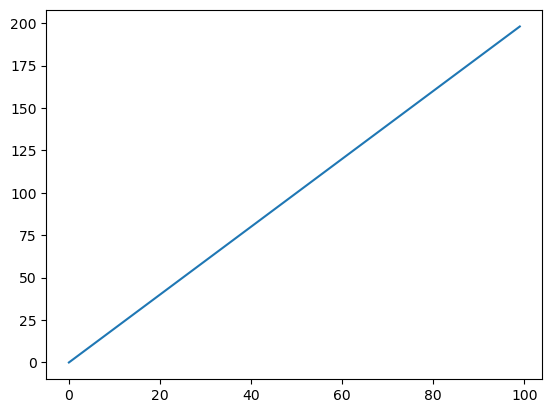

<function matplotlib.pyplot.show(close=None, block=None)>

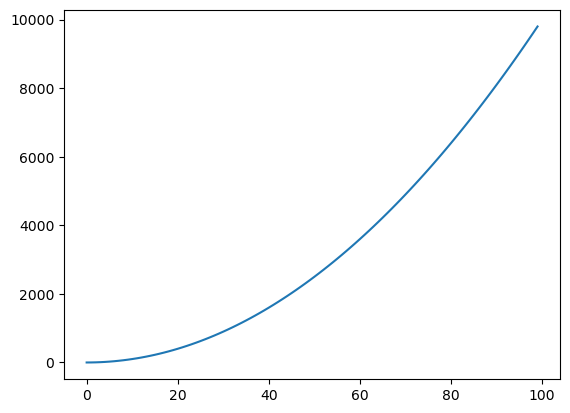

In [4]:
# Method 1
plt.plot(x, y)
plt.show()
plt.plot(x,z)
plt.show

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

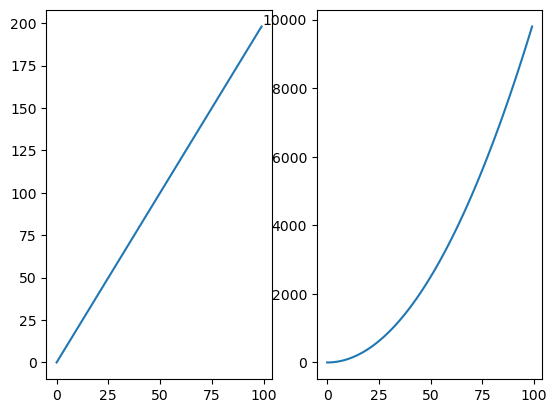

In [21]:
# Method 2
plt.subplot(1,2,1)
plt.plot(x,y)
plt.subplot(1,2,2)
plt.plot(x,z)

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

/var/folders/vh/7qkb52p54kq6xrbpd6rqjwsm0000gp/T/ipykernel_15304/754795105.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart_1.set_xticklabels(x, fontsize=14)
/var/folders/vh/7qkb52p54kq6xrbpd6rqjwsm0000gp/T/ipykernel_15304/754795105.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart_2.set_xticklabels(x, fontsize=14)
/var/folders/vh/7qkb52p54kq6xrbpd6rqjwsm0000gp/T/ipykernel_15304/754795105.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart_1.set_yticklabels(y, fontsize=14)
/var/folders/vh/7qkb52p54kq6xrbpd6rqjwsm0000gp/T/ipykernel_15304/754795105.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart_2.set_yticklabels(z, fontsize=14)


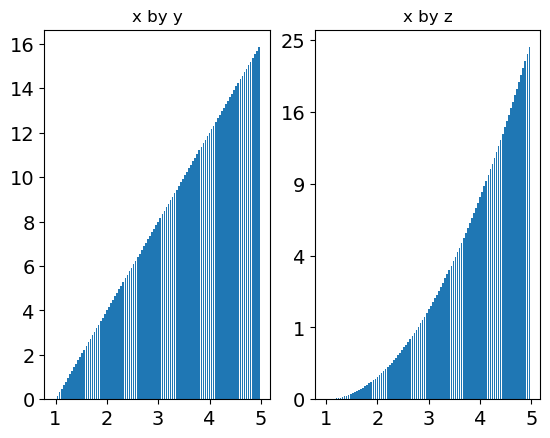

In [22]:
# your code here

plot_options, (chart_1, chart_2) = plt.subplots(nrows=1, ncols=2)

chart_1.bar(x,y)
chart_2.bar(x,z)


chart_1.set_xticklabels(x, fontsize=14)
chart_2.set_xticklabels(x, fontsize=14)

chart_1.set_yticklabels(y, fontsize=14)
chart_2.set_yticklabels(z, fontsize=14)


chart_1.title.set_text('x by y')
chart_2.title.set_text('x by z')

plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

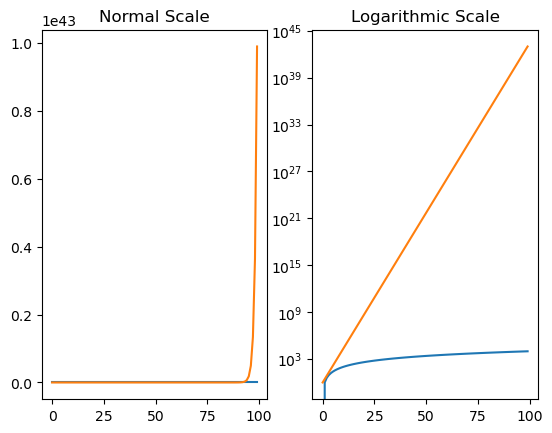

In [24]:
# your code here
plt.subplot(1, 2, 1)
plt.plot(x, x**2)
plt.plot(x, np.exp(x))
plt.title("Normal Scale")

plt.subplot(1, 2, 2)
plt.plot(x, x**2)
plt.plot(x, np.exp(x))
plt.yscale("log")
plt.title("Logarithmic Scale")

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

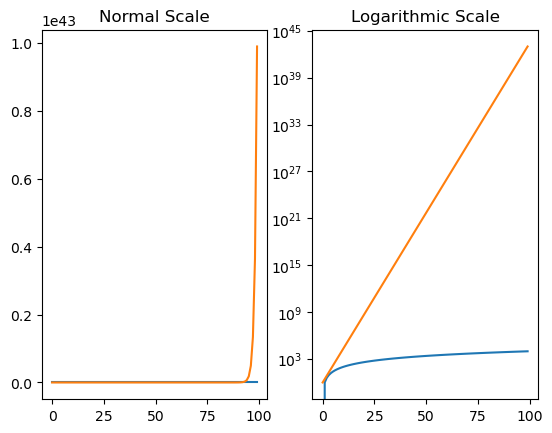

In [27]:
# your code here
plt.subplot(1, 2, 1)
plt.plot(x, x**2, label='normal')
plt.plot(x, np.exp(x))
plt.title("Normal Scale")
plt.legend

plt.subplot(1, 2, 2)
plt.plot(x, x**2, label='log')
plt.plot(x, np.exp(x))
plt.yscale("log")
plt.title("Logarithmic Scale")
plt.legend


plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [30]:
# your code here
import pandas as pd
fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [ ]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [ ]:
# your code here

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [31]:
# your code here
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [34]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [98]:
# NUMERICAL VARIABLES
# your code here
numerical_variables = titanic.select_dtypes(np.number)
numerical_variables.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [42]:
# CATEGORICAL VARIABLES
# your code here
categorical_variables = titanic.select_dtypes(object)
categorical_variables.head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [56]:
plt.style.use('classic')
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

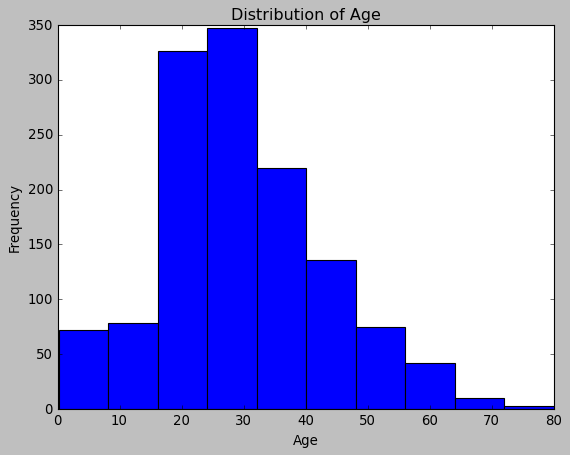

<Figure size 960x480 with 0 Axes>

In [91]:
# your code here

plt.hist(numerical_variables['Age'], bins=10)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.style.use('classic')
plt.figure(figsize=(12,6))
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

/var/folders/vh/7qkb52p54kq6xrbpd6rqjwsm0000gp/T/ipykernel_15304/2301152759.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart_1.set_xticklabels(ages, fontsize=10)
/var/folders/vh/7qkb52p54kq6xrbpd6rqjwsm0000gp/T/ipykernel_15304/2301152759.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart_1.set_yticklabels(ages, fontsize=10)
/var/folders/vh/7qkb52p54kq6xrbpd6rqjwsm0000gp/T/ipykernel_15304/2301152759.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart_2.set_xticklabels(ages, fontsize=10)
/var/folders/vh/7qkb52p54kq6xrbpd6rqjwsm0000gp/T/ipykernel_15304/2301152759.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart_2.set_yticklabels(ages, fontsize=10)
/var/folders/vh/7qkb52p54kq6xrbpd6rqjwsm0000gp/T/ipykernel_15304/2301152759.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart_3.set_xticklabels(ages

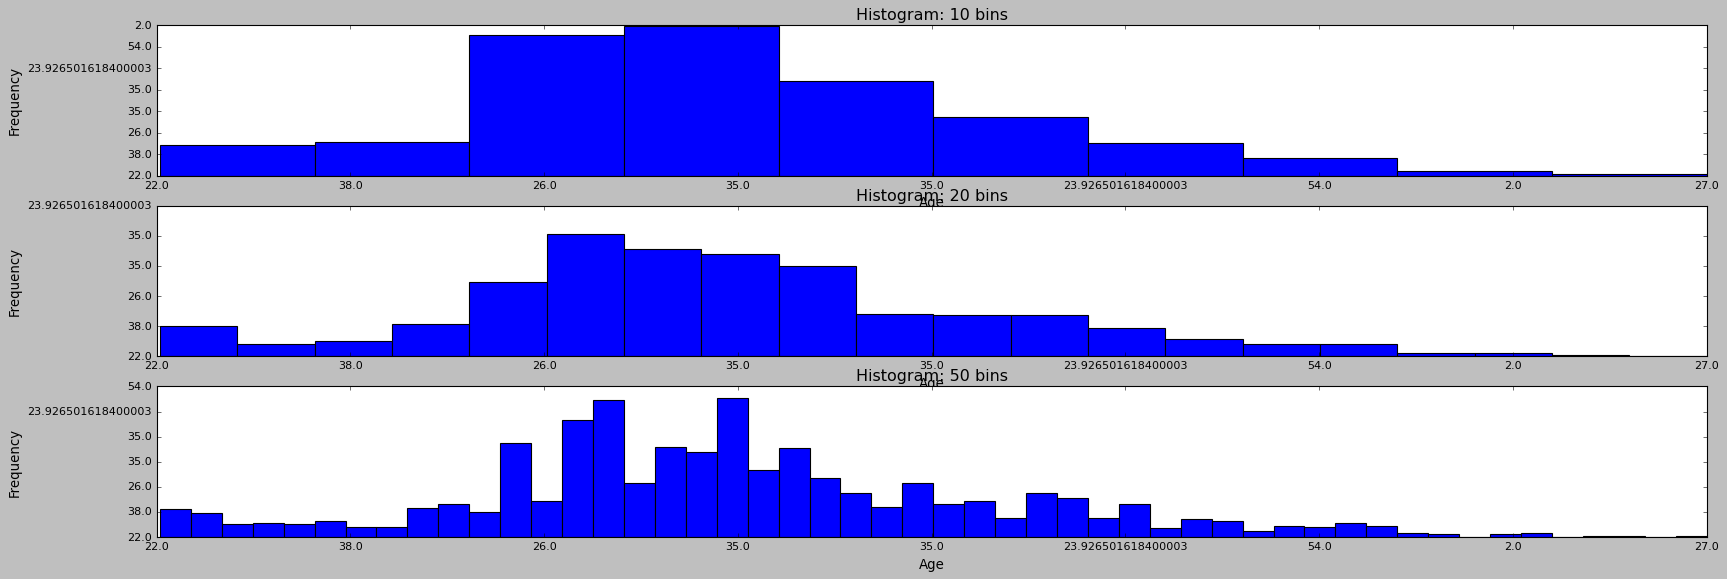

In [93]:
# your code here

ages = numerical_variables['Age']

plot_options, (chart_1, chart_2, chart_3) = plt.subplots(nrows=3, ncols=1, figsize=(25,8))



chart_1.hist(ages, bins=10)
chart_1.set_xlabel('Age')
chart_1.set_ylabel('Frequency')
chart_1.set_xticklabels(ages, fontsize=10)
chart_1.set_yticklabels(ages, fontsize=10)
chart_1.title.set_text('Histogram: 10 bins')


chart_2.hist(ages, bins=20)
chart_2.set_xlabel('Age')
chart_2.set_ylabel('Frequency')
chart_2.set_xticklabels(ages, fontsize=10)
chart_2.set_yticklabels(ages, fontsize=10)
chart_2.title.set_text('Histogram: 20 bins')


chart_3.hist(ages, bins=50)
chart_3.set_xlabel('Age')
chart_3.set_ylabel('Frequency')
chart_3.set_xticklabels(ages, fontsize=10)
chart_3.set_yticklabels(ages, fontsize=10)
chart_3.title.set_text('Histogram: 50 bins')

plt.style.use('classic')

plt.show()


#### How does the bin size affect your plot?

In [ ]:
"""
With a larger bin size, shown in the last graph, you are able to see the disparity in ages clearer. 
"""

#### Use seaborn to show the distribution of column `Age`.

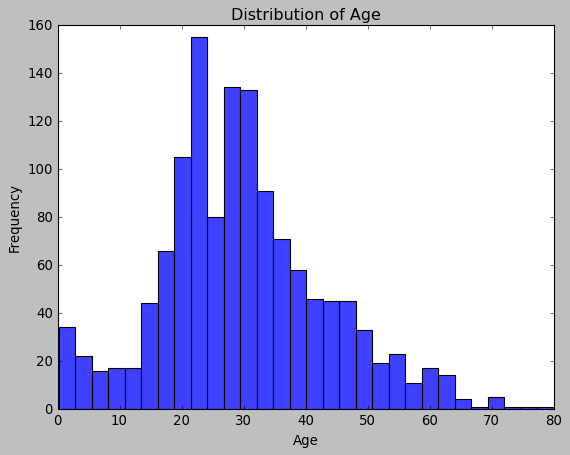

<Figure size 960x480 with 0 Axes>

In [99]:
# your code here
ages = numerical_variables['Age']
sns.histplot(ages)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.style.use('classic')
plt.figure(figsize=(12,6))
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

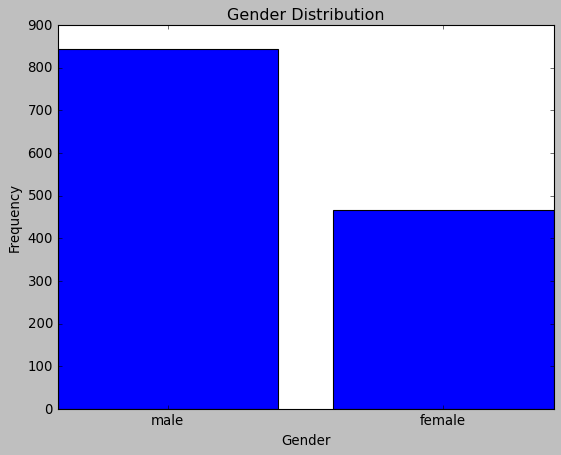

<Figure size 960x480 with 0 Axes>

In [95]:
# Method 1 - matplotlib
# your code here

gender = categorical_variables['Gender'].value_counts()

plt.bar(gender.index, gender.values)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Distribution')
plt.style.use('classic')
plt.figure(figsize=(12,6))
plt.show()

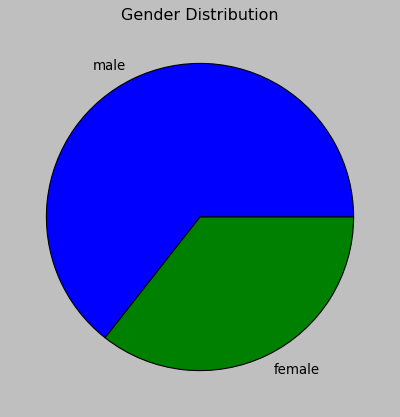

<Figure size 960x480 with 0 Axes>

In [96]:
# Method 2 - seaborn
# your code here

gender = categorical_variables['Gender'].value_counts()

plt.pie(gender.values, labels=gender.index)
plt.title('Gender Distribution')
plt.style.use('classic')
plt.figure(figsize=(12,6))
plt.show()

#### Use the right plot to visualize the column `Pclass`.

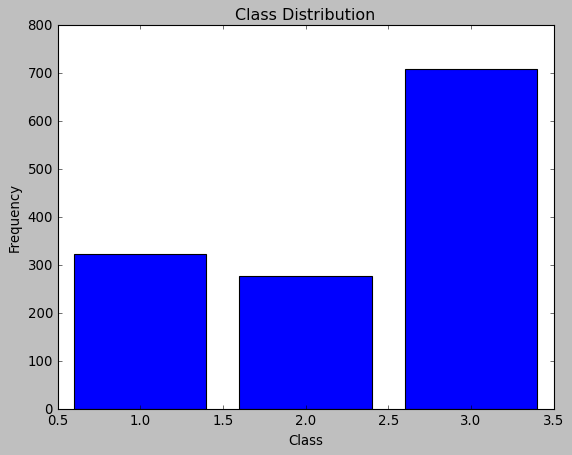

<Figure size 960x480 with 0 Axes>

In [102]:
# your code here
Pclass = numerical_variables['Pclass'].value_counts()


plt.bar(Pclass.index, Pclass.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.style.use('classic')
plt.figure(figsize=(12,6))

plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

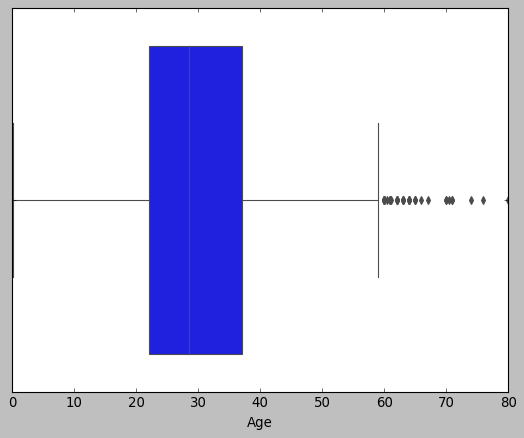

In [106]:
# your code here
ages = numerical_variables['Age']

sns.boxplot(x = ages)
plt.show()

In [ ]:
"""
A box plot gives a good summary of Age as the audience can quickly identify useful stats such as the min, max, 
median as well as the outliers in the data.

"""


#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
1. Most of the data ranges from 0 to 60
2. Median age is just under 30
3. There are quite a few outliers. 
4. Minimun age is 0 - in months 
5. Maximum age is ~70/72
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

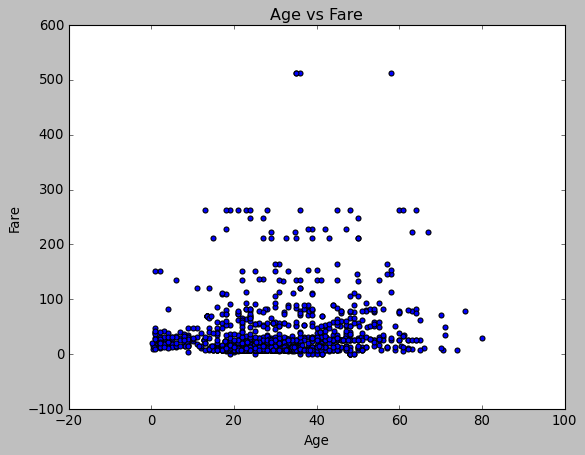

<Figure size 960x480 with 0 Axes>

In [109]:
# Method 1 - matplotlib
# your code here
ages = numerical_variables['Age']
fare = numerical_variables['Fare']

plt.scatter(ages, fare)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.style.use('classic')
plt.figure(figsize=(12,6))

plt.show()

In [113]:
# Method 2 - seaborn
# your code here




#### Plot the correlation matrix using seaborn.

In [137]:
# your code here
ages = numerical_variables['Age']
fare = numerical_variables['Fare']

age_fare = ages.corr(fare)
age_fare


plt.matshow(age_fare.corr())
plt.show()

0.17135508596244758

# What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here